## Regression (Fish Weight Estimation)
The dataset used in this project is from (https://www.kaggle.com/aungpyaeap/fish-market) from the Kaggle Dataset. The dataset was downloaded to a .CSV file which will be used in this notebook below.

In [522]:
#Clear memory
from IPython import get_ipython
get_ipython().magic('reset -sf')

#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

#Allows the plot to be displayed next to the code
%matplotlib inline

In [523]:
 #Import dataset
df = pd.DataFrame(pd.read_csv('Fish.csv'))

#Checking out the first few rows of the dataset
print(df.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


### Meanings of the Columns:
<ul>
 <li>Species: Species name of fish</li>
 <li>Weight: Weight of fish in gram</li>
 <li>Length1: Vertical length in cm</li>
 <li>Length2: Diagonal length in cm</li>
 <li>Length3: Cross length in cm</li>
 <li>Height: Height in cm</li>
 <li>Width: Diagonal width in cm</li>
</ul>

The dependent/response variable is 'Weight'. Independent variables/predictors are Species, vertical length, diagonal length, cross length, Height, and Diagonal witdh

The predictors will be used to estimate the weight of the different fish

In [524]:
#Checking the number of rows and columns in the dataset
df.shape

(159, 7)

In [525]:
# Checking out the type of data in the dataset
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

### Data Preparation, cleaning, and visualization
<ul>
 <li>The dataset has 7 columns; 6 floats and one categorical</li>
 <li>The next steps will involve renaming some of the columns</li>
 <li>Visualizing the data</li>
 <li>Check if there are misssing, invalid data, or outliers</li>
</ul>

In [526]:
#renaming some columns
df.rename(columns = {'Length1': 'LengthVert', 'Length2': 'LengthDiag', 'Length3':'LengthCross'}, inplace = True)
df.head()

,Species,Weight,LengthVert,LengthDiag,LengthCross,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [527]:
#Check for any null values in the dataset
df.isnull().sum()

Species        0
Weight         0
LengthVert     0
LengthDiag     0
LengthCross    0
Height         0
Width          0
dtype: int64

there are no null/empty values in the dataset

#### DATA VISUALIZATION:

In [528]:
species = df['Species'].value_counts()
species = pd.DataFrame(species)
species.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


#### Bar chart Visualization

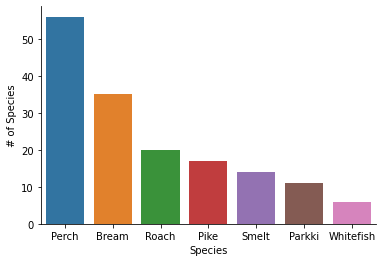

In [529]:

sns.barplot(x=species.index, y=species['Species']);
plt.xlabel('Species')
plt.ylabel('# of Species')
plt.show()

#### Pie chart visualization

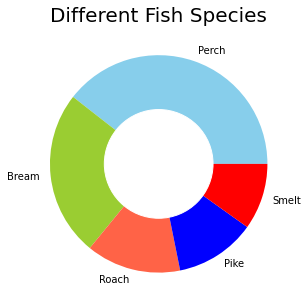

In [530]:
a = df["Species"].value_counts().head()
index = a.index
sources = a.values
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(5, 5))
plt.pie(sources, labels=index, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Different Fish Species", fontsize=20)
plt.show()

#### Creating Scatter Plots of all variables

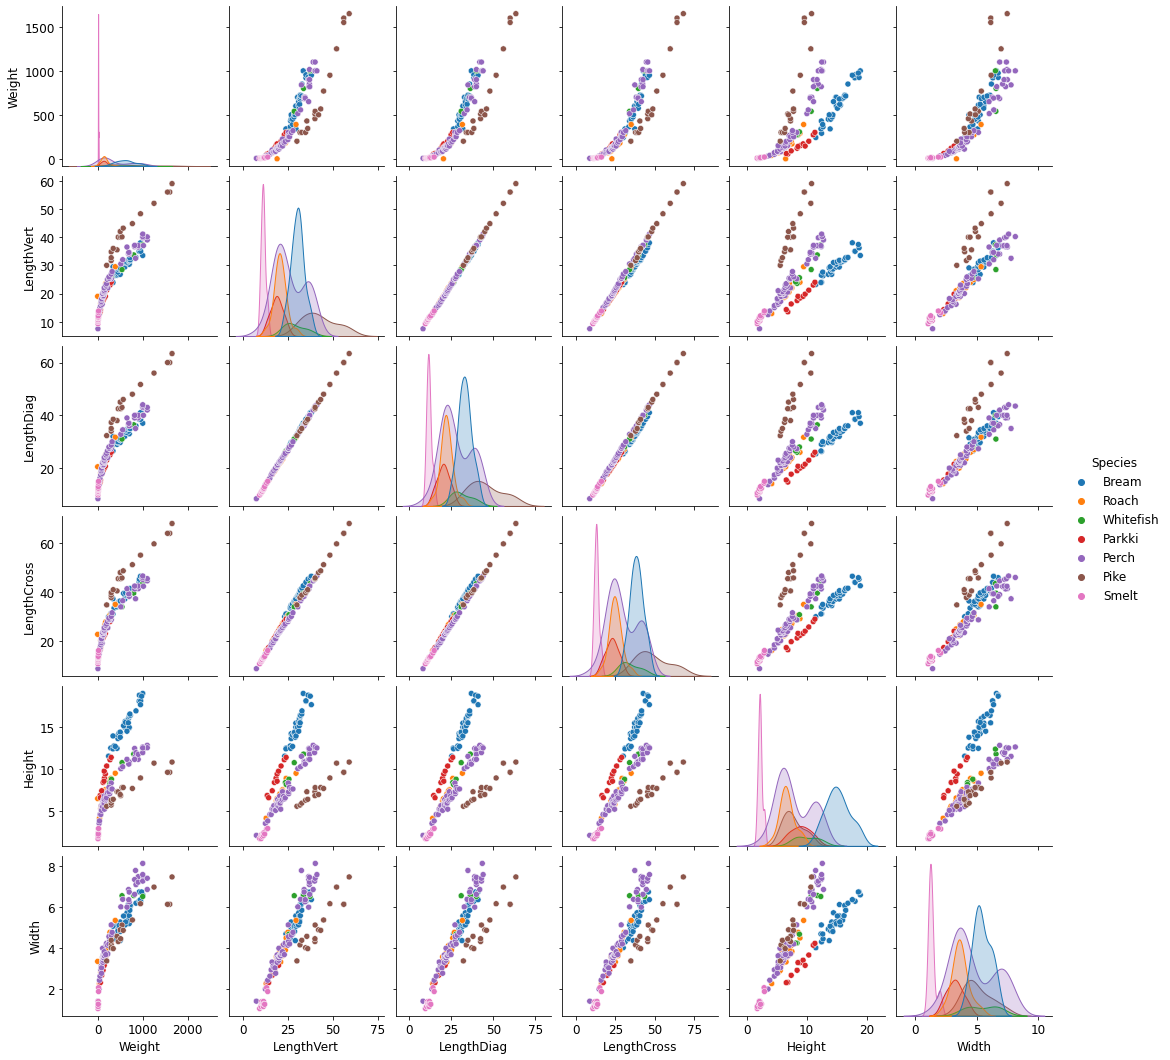

In [531]:
sns.pairplot(df, kind='scatter', hue='Species')

### DATA CLEANING

#### Check for and remove outliers

<AxesSubplot:ylabel='Weight'>

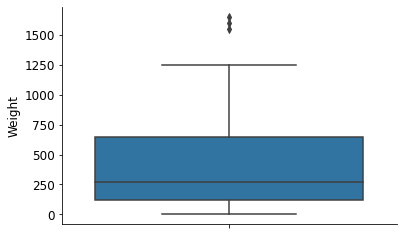

In [532]:
# Checking for outliers on the weight variable

sns.boxplot(y =df['Weight'])

In [533]:
#identifying outliers in the weight variable

dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers


142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

the outliers are in rows 142 - 144 for the 'Weight' variable

<AxesSubplot:ylabel='LengthVert'>

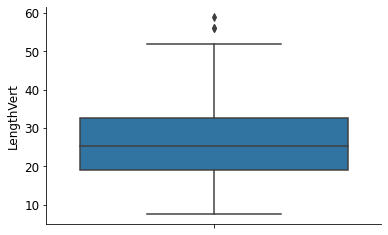

In [534]:
# Checking for outliers on the LengthVert variable

sns.boxplot(y =df['LengthVert'])

In [535]:
dflvert = df['LengthVert']
dflvert_Q1 = dflvert.quantile(0.25)
dflvert_Q3 = dflvert.quantile(0.75)
dflvert_IQR = dflvert_Q3 - dflvert_Q1
dflvert_lowerend = dflvert_Q1 - (1.5 * dflvert_IQR)
dflvert_upperend = dflvert_Q3 + (1.5 * dflvert_IQR)

dflvert_outliers = dflvert[(dflvert < dflvert_lowerend) | (dflvert > dflvert_upperend)]
dflvert_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVert, dtype: float64

the outliers are in rows 142 - 144 for the 'LengthVert' variable

<AxesSubplot:xlabel='LengthDiag'>

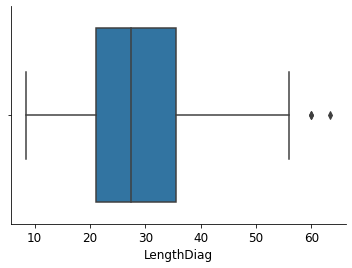

In [536]:
# Checking for outliers on the LengthVert variable

sns.boxplot(x =df['LengthDiag'])

In [537]:
dfdiag = df['LengthVert']
dfdiag_Q1 = dfdiag.quantile(0.25)
dfdiag_Q3 = dfdiag.quantile(0.75)
dfdiag_IQR = dfdiag_Q3 - dfdiag_Q1
dfdiag_lowerend = dfdiag_Q1 - (1.5 * dfdiag_IQR)
dfdiag_upperend = dfdiag_Q3 + (1.5 * dfdiag_IQR)

dfdiag_outliers = dfdiag[(dfdiag < dfdiag_lowerend) | (dfdiag > dfdiag_upperend)]
dfdiag_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVert, dtype: float64

the outliers are in rows 142 - 144 for the 'LengthDiag' variable

<AxesSubplot:xlabel='LengthCross'>

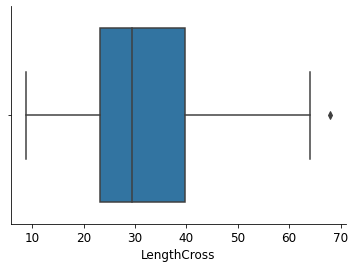

In [538]:
# Checking for outliers on the LengthVert variable

sns.boxplot(x =df['LengthCross'])

In [539]:
dfcross = df['LengthVert']
dfcross_Q1 = dfcross.quantile(0.25)
dfcross_Q3 = dfcross.quantile(0.75)
dfcross_IQR = dfcross_Q3 - dfcross_Q1
dfcross_lowerend = dfcross_Q1 - (1.5 * dfcross_IQR)
dfcross_upperend = dfcross_Q3 + (1.5 * dfcross_IQR)

dfcross_outliers = dfcross[(dfcross < dfcross_lowerend) | (dfcross > dfcross_upperend)]
dfcross_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVert, dtype: float64

the outliers are in rows 142 - 144 for the 'LengthCross' variable
Since outliers were identified in rows 142 - 144 of the dataframe, we can assume that a similar observation will be seen in the Height and Width variables as well


In [540]:
df_drop = df.iloc[142:145]
df_drop

,Species,Weight,LengthVert,LengthDiag,LengthCross,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [541]:
df.shape

(159, 7)

In [542]:
dfnew = df.drop([142,143, 144], axis = 0)
dfnew.shape

(156, 7)

### PREPARING THE MACHINE LEARNING MODEL:

#### Separating Dependant and Independant Variables

In [543]:
#Creating the independent/predictor variables and dependent/response variables

#independent variables
X = dfnew.iloc[:,[0,2,3,4,5,6]]

#dependent variables
y = dfnew['Weight']

In [544]:
dfnew.iloc[:,[0,2,3,4,5,6]]

,Species,LengthVert,LengthDiag,LengthCross,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,13.2,14.3,15.2,2.8728,2.0672


### Encoding the 'Species' variable from string to integers

In [545]:
X.head()

,Species,LengthVert,LengthDiag,LengthCross,Height,Width
0,Bream,23.2,25.4,30.0,11.5200,4.0200
1,Bream,24.0,26.3,31.2,12.4800,4.3056
2,Bream,23.9,26.5,31.1,12.3778,4.6961
3,Bream,26.3,29.0,33.5,12.7300,4.4555
4,Bream,26.5,29.0,34.0,12.4440,5.1340


In [546]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [547]:
#Encoding State feature from string to integers
from sklearn import preprocessing
theSpecies = preprocessing.LabelEncoder()
theSpecies.fit(X['Species'])

list(theSpecies.classes_)



['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

In [548]:
#Transforming and dropping the Categorical State variable
X['NewSpecies'] = theSpecies.transform(X['Species'])
X = X.drop(columns='Species',axis=1)
X.head()

,LengthVert,LengthDiag,LengthCross,Height,Width,NewSpecies
0,23.2,25.4,30.0,11.5200,4.0200,0
1,24.0,26.3,31.2,12.4800,4.3056,0
2,23.9,26.5,31.1,12.3778,4.6961,0
3,26.3,29.0,33.5,12.7300,4.4555,0
4,26.5,29.0,34.0,12.4440,5.1340,0


### splitting dataset into train and test

In [559]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### fitting the linear model to training set

In [560]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### predicting the test dataset

In [561]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 685.90127483,  539.50447237,  109.56761715,  706.05177313,
        666.17959332,  414.05037728,  224.5755673 ,  414.88602765,
        578.99776821,  198.95344567,  136.71067101,  309.82579417,
        411.51315408,  816.53289918,  425.43461465, -134.91131431,
        952.61670095,  870.73520682,  241.87957188,  284.07562175,
       -114.44053778,  487.04450507,  667.09928091,  839.80541934,
        746.89579864,  -88.5377559 ,  159.37685036,   11.84497431,
        121.57244341,  129.34072684,  581.72481271,  592.56810639])

### evaluating the model

In [562]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9170173419704405

### fitting the polynomial model to training set

All we have left to do is train our model. We create an object poly_reg of the LinearRegression class (remember that Polynomial Regression is technically linear, so it falls under the same class) and fit our transformed x values and y values to the model.


In [ ]:
#fitting the polynomial regression model to the dataset
from sklearn.preprocessing import PolynomialFeatures

poly =  PolynomialFeatures(degree=2) #starting out with a 2 degree polynomial to fit the data

X_poly = poly.fit_transform(X_train) #transforming the input data into a polynomial

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)


In [570]:
# Calculating the R squared value of the Quadratic Polynomial

poly_reg.score(X_poly, y_train)

0.9869191066041555

The quadratic polynomial fitted the data better at 98.6% versus a linear model which fitted the data at 91.7%

In [599]:
#predictig the result of polynomial regression model.

poly_reg.predict(poly.fit_transform(np.array([[24, 26.3, 31.2, 12.48, 4.3056, 0]])))

array([339.17529297])

In [600]:
#predictig the result of linear regression model.

regressor.predict(np.array([[24, 26.3, 31.2, 12.48, 4.3056, 0]]))

array([333.32306233])

In [608]:
dfnew.iloc[1,:]

Species         Bream
Weight          290.0
LengthVert       24.0
LengthDiag       26.3
LengthCross      31.2
Height          12.48
Width          4.3056
Name: 1, dtype: object

As shown above, both model aren't accurate. The weigh of the Bream Fish should be **290**, but the polynomial model predicted **339** while the linear model predicted **333**